Simple linear regression coefficents: [[0.27686542]]
Simple linear regression coefficients: [37.05858158]
Multiple linear regression coefficients: [0.15705846 0.20300944 0.14651308 0.3466355 ]
Multiple linear regression intercept: 25.829968920832513
[[329  15]
 [100  34]]


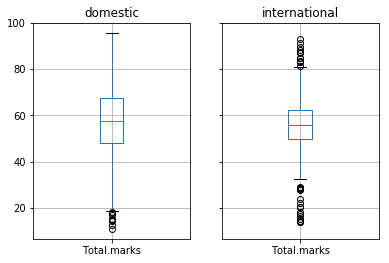

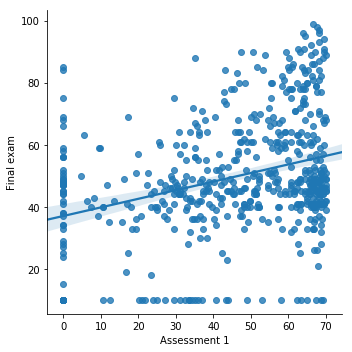

In [2]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#------------ Part a ------------
dataset = pd.read_csv('student_results.csv')

#------------ Part b ------------
dataset = dataset.fillna(0)

#------------ Part c ------------
n = len(dataset)
FullMarks = pd.Series([70, 30, 70, 30, 30, 20, 30, 20, 30, 20, 50, 2, 100],
                        index = ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 
                                 'Online quiz 2', 'Online quiz 3', 'Online quiz 4',
                                 'Group assignment 1', 'Group assignment 2',
                                 'Assessment 3', 'Assessment 4', 'Group assignment 3',
                                 ' Group evaluation', 'Final exam'])
Weight = pd.Series([0.07, 0.03, 0.07, 0.03, 0.03, 0.02, 0.03, 0.02, 0.024, 0.016, 0.04, 0.02, 0.6],
                  index = ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 
                                 'Online quiz 2', 'Online quiz 3', 'Online quiz 4',
                                 'Group assignment 1', 'Group assignment 2',
                                 'Assessment 3', 'Assessment 4', 'Group assignment 3',
                                 ' Group evaluation', 'Final exam'])

dataset['Total.marks'] = (dataset.loc[0:n, ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 
                                 'Online quiz 2', 'Online quiz 3', 'Online quiz 4',
                                 'Group assignment 1', 'Group assignment 2',
                                 'Assessment 3', 'Assessment 4', 'Group assignment 3',
                                 ' Group evaluation', 'Final exam']] / FullMarks * Weight * 100).sum(1)

dataset.loc[0:n, ['Total.marks', 'Student category']].groupby('Student category').boxplot()

#------------ Part d ------------
dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').mean()
dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').var()
dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').std()

#------------ Part e ------------
Details = ['Fail', 'Pass', 'Credit', 'Distinction', 'High Distinction']
Range = [0, 50, 65, 75, 85, 100.01]
dataset['Grade'] = pd.cut(dataset['Total.marks'], right = False, bins = Range, labels = Details)
dataset['Grade']

#------------ Part f ------------
slr = LinearRegression(fit_intercept = True)
x = dataset[['Assessment 1']]
y = dataset[['Final exam']]
slr.fit(x, y)
print('Simple linear regression coefficents:', slr.coef_)
print('Simple linear regression coefficients:', slr.intercept_)
df_part_f = pd.DataFrame(dataset.loc[0:n, ['Final exam', 'Assessment 1']])
sb.lmplot("Assessment 1", "Final exam", df_part_f)

#------------ Part g ------------
x = dataset[['Assessment 1', 'Assessment 3', 'Online quiz 1 ', 'Group assignment 2']]
y = dataset['Final exam']
mlr = LinearRegression(fit_intercept = True)
mlr.fit(x, y)
print('Multiple linear regression coefficients:', mlr.coef_)
print('Multiple linear regression intercept:', mlr.intercept_)

#------------ Part h ------------
dataset.loc[dataset['Grade'] == 'Fail', 'Status'] = 'Incomplete'
dataset.loc[dataset['Grade'] != 'Fail', 'Status'] = 'Complete'
x_train = dataset.loc[0:99, ['Assessment 3']]
y_train = dataset.loc[0:99, ['Status']]
x_test = dataset.loc[100:n, ['Assessment 3']]
y_test = dataset.loc[100:n, ['Status']]
logr = LogisticRegression()
logr.fit(x_train, y_train.values.ravel())
predictions = logr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)